In [10]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [5]:
#ESERCIZIO 1

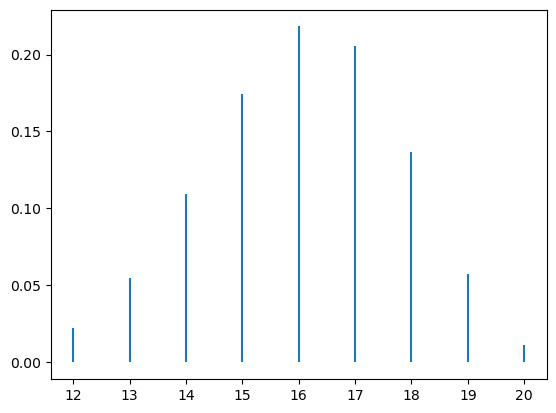

In [7]:
#1.3 
nC = 20
pC = 0.8
Z = st.binom(nC, pC)
inizio = int(Z.ppf(0.01))
fine = int(Z.ppf(0.99))
x = range(inizio, fine+1, 1)
plt.vlines(x, 0, Z.pmf(x))
plt.show()

In [8]:
#ESERCIZIO 4

In [13]:
acquisti = pd.read_csv('acquisti.csv', sep = ',')
acquisti

,bottiglie_acquistate,bottiglie_rese,temperatura
0,3481.0,1324.0,18.0
1,3463.0,NaN,10.0
2,3464.0,1353.0,39.0
3,3527.0,986.0,0.0
4,3367.0,2190.0,-3.0
...,...,...,...
3995,3516.0,1046.0,7.0
3996,3420.0,1669.0,32.0
3997,3487.0,1472.0,14.0
3998,3552.0,1957.0,9.0


In [21]:
#4.1 Percentuale di casi nel dataset che contiene almeno un valore mancante
((len(acquisti)-len(acquisti.dropna()))/len(acquisti))*100

0.27499999999999997

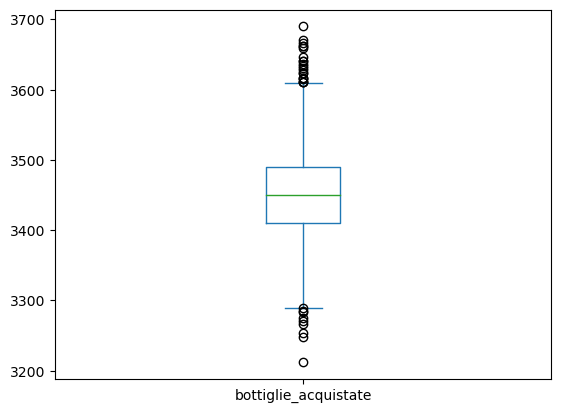

Uso un box plot in modo tale da evidenziare il range di valori coperto dall attributo e
la dispersione dei valori. Si nota come i valori appaiono distribuiti in modo
centrale e con molti outlier.


In [28]:
#4.2 Grafico per visualizzare in modo opportuno il carattere bottiglie_acquistate
acquisti.bottiglie_acquistate.plot.box()
plt.show()
print('Uso un box plot in modo tale da evidenziare il range di valori coperto dall attributo e\nla dispersione dei valori. Si nota come i valori appaiono distribuiti in modo\ncentrale e con molti outlier.')

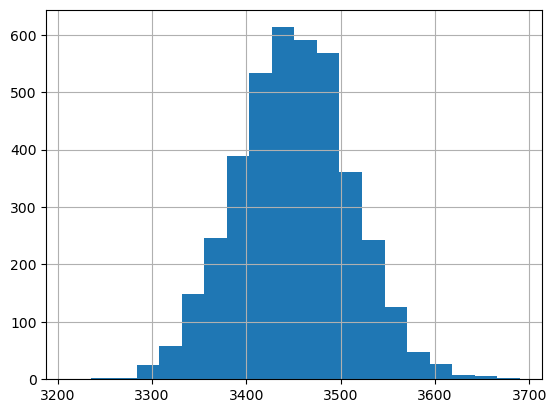

In [31]:
#4.3 Usate un istogramma per evidenziare i valori del punto precedente, come mai si può usare?
acquisti.bottiglie_acquistate.hist(bins = 20)
plt.show()
print('Possiamo usare un istogramma perchè l attributo è diventato continuo, poichè definito come Rtot dell esercizio\ndi prima.')

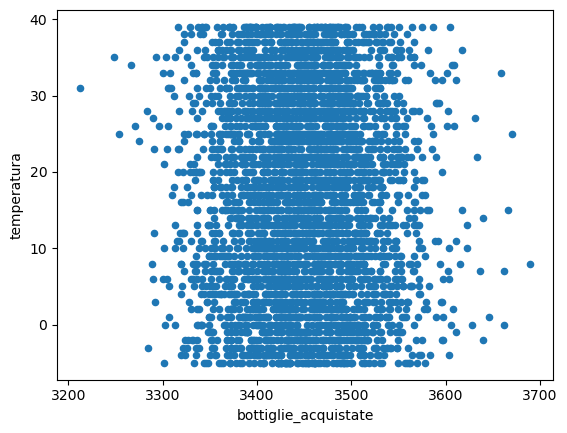

Lo scatter plot evidenzia come non vi sia alcun tipo di relazione tra i due attributi, ne diretta ne indiretta.
-0.006180512682684298
L indice di correlazione tra i due attributi tendente a 0 conferma tale ipotesi.


In [35]:
#4.4 Esiste una relazione diretta tra bottiglie_acquistate e temperatura?
acquisti.plot.scatter('bottiglie_acquistate', 'temperatura')
plt.show()
print('Lo scatter plot evidenzia come non vi sia alcun tipo di relazione tra i due attributi, ne diretta ne indiretta.')
print(acquisti['bottiglie_acquistate'].corr(acquisti['temperatura']))
print('L indice di correlazione tra i due attributi tendente a 0 conferma tale ipotesi.')

In [86]:
'''
4.5 Una bottiglia costa 1 euro e il distributore applica uno sconto di 10 cent per ogni botiglia resa. Aggiungere al dataset
una colonna chiamata ricavo che contenga il ricavo settimanale per ogni caso.
'''
acquisti.insert(loc = 3, value = [(acquisti.bottiglie_acquistate[i]-(0.10*acquisti.bottiglie_rese[i])) for i in acquisti.index], column="ricavo")
acquisti


ValueError: cannot insert ricavo, already exists

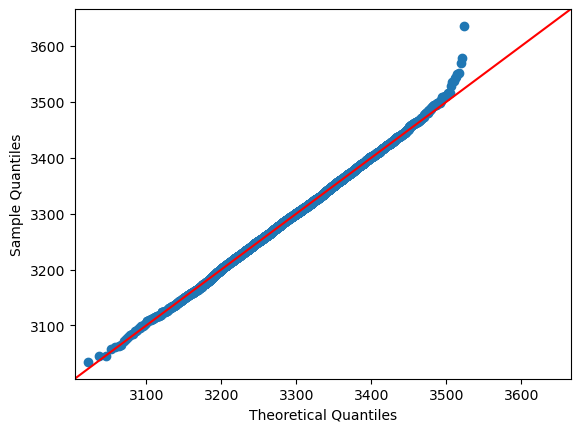

Il QQ-plot permette di confrontare i quantili empirici con quelli teorici assunti dall attributo da esaminare. Come si vede, i valori dei quantili si distribuiscono bene sulla bisettrice, per cui si può dire che il ricavo segue una legge normale.
3299.699348534201 3300.0
I valori di media e mediana molto simili confermano tale ipotesi.


In [88]:
#4.6 Valutare l'ipotesi che il ricavo settimanale sia descritto da un modello normale
sm.qqplot(acquisti.ricavo, dist = st.norm(acquisti.ricavo.mean(), acquisti.ricavo.std()), line = '45')
plt.show()
print('Il QQ-plot permette di confrontare i quantili empirici con quelli teorici assunti dall attributo da esaminare. Come si vede, i valori dei quantili si distribuiscono bene sulla bisettrice, per cui si può dire che il ricavo segue una legge normale.')
print(acquisti.ricavo.mean(), acquisti.ricavo.median())
print('I valori di media e mediana molto simili confermano tale ipotesi.')

In [66]:
#4.7 I risultati precedenti confutano le ipotesi iniziali dell'esercizio 3? Se si quali vanno riesaminate?
print('Essendo il ricavo assimilabile ad un modello normale, ')

Essendo il ricavo assimilabile ad un modello normale, 


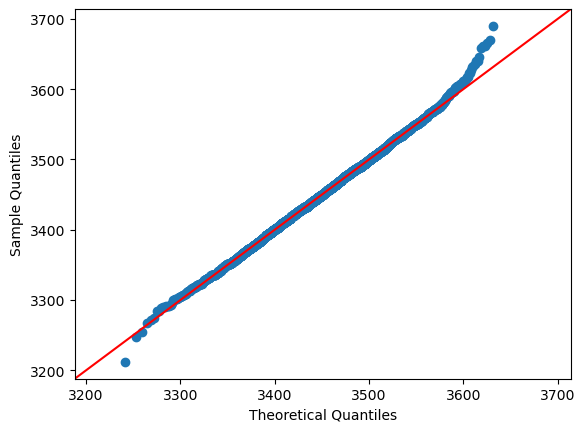

Come prima, usiamo un QQ-plot e si nota come i valori dei quantili si distribuiscono bene sulla bisettrice, per cui si può dire che il numero di bottiglie acquistate segue una legge normale.
3450.124124124124 3450.0
I valori di media e mediana molto simili confermano tale ipotesi.


In [70]:
#4.8 Il numero di bottiglie acquistate è descritto da un modello normale?
sm.qqplot(acquisti.bottiglie_acquistate, 
          dist = st.norm(acquisti.bottiglie_acquistate.mean(), acquisti.bottiglie_acquistate.std()), 
          line = '45')
plt.show()
print('Come prima, usiamo un QQ-plot e si nota come i valori dei quantili si distribuiscono bene sulla bisettrice, per cui si può dire che il numero di bottiglie acquistate segue una legge normale.')
print(acquisti.bottiglie_acquistate.mean(), acquisti.bottiglie_acquistate.median())
print('I valori di media e mediana molto simili confermano tale ipotesi.')

In [71]:
'''
ESERCIZIO 5
In questo esercizio interpreteremo i valori di bottiglie_acquistate come un campione estratto da una popolazione distribuita 
come Ctot dell'esercizio 3 e i valori di ricavo come un campione estratto da una popolazione T
'''

In [76]:
#5.1 Stimare valore atteso di Ctot indicandone la taglia ed eventuali proprietà
print(acquisti.bottiglie_acquistate.mean())
print('Taglia campione:', len(acquisti.bottiglie_acquistate.dropna()))
print('Lo stimatore usato è la media campionaria, e in quanto tale è uno stimatore non distorto del valore atteso della popolazione ed è anche consistente in media quadratica.')


3450.124124124124
Taglia campione: 3996
Lo stimatore usato è la media campionaria, e in quanto tale è uno stimatore non distorto del valore atteso della popolazione ed è anche consistente in media quadratica.


In [79]:
#5.2 Stimare la deviazione standard di Ctot, specificandone la taglia ed eventuali proprietà 
print(acquisti.bottiglie_acquistate.std())
print('Taglia campione:', len(acquisti.bottiglie_acquistate.dropna()))
print('Lo stimatore usato è la varianza campionaria, che è sempre uno stimatore non distorto della varianza della popolazione. Dato che a noi interessa la deviazione standard, ne abbiamo fatto la radice quadrata e quindi non sappiamo più se è uno stimatore distorto oppure no.')

60.037894654974885
Taglia campione: 3996
Lo stimatore usato è la varianza campionaria, che è sempre uno stimatore non distorto della varianza della popolazione. Dato che a noi interessa la deviazione standard, ne abbiamo fatto la radice quadrata e quindi non sappiamo più se è uno stimatore distorto oppure no.


In [80]:
'''
5.3 Il magazzino del distributore riceve ogni settimana 3600 bottiglie. Come si può indicare l'evento E che indica 
che il numero di queste bottiglie non è sufficiente a soddisfare la domanda dei clienti?
''' 
print('P(E) = P(Ctot) >= 3600 = 1- P(Ctot) < 3600') 

P(E) = P(Ctot) >= 3600 = 1- P(Ctot) < 3600


In [81]:
#5.4 Alla base del risultato del punto 4.8, calcolare la probabilità dell'evento E di prima
Z = st.norm(acquisti.bottiglie_acquistate.mean(), acquisti.bottiglie_acquistate.std())
1 - Z.cdf(3600)

0.006273854495658315

In [84]:
#5.5 Stimare il valore atteso della popolazione T di prima
print('Stimatore: media campionaria', acquisti.ricavo.mean())

Stimatore: media campionaria 3299.699348534201


In [89]:
#5.6 calcolo probabilità che la stima di prima disti, per eccesso o difetto, più di 10 euro rispetto al valore conosciuto
n = len(acquisti.ricavo.dropna())
std = acquisti.ricavo.std()
p = 1 - st.norm(loc=0, scale=1).cdf((10*math.sqrt(n))/std)
p

63.586347414301166